# Ratul Chakraborty
# BDA 2nd Sem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Functions

In [2]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    return 1/(1 + np.exp(-z))

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot((1 - labels), np.log(1-predictions))

    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = -(cost/observations)

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = features.shape[1]

    #1 - Get Predictions
    predictions = predict(features, weights)

    gradient = np.dot((predictions - labels), features)

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - lr*gradient

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## Data

In [3]:
data = pd.read_table("data_banknote_authentication.txt", delimiter=",")
data

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
X = data.iloc[:, :2]
y = data.iloc[:, 4]

In [5]:
# Train Test Split
x_train, x_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
x_train.shape

(1096, 2)

In [7]:
# Initialize the weights
wts = np.random.pareto(3, size = x_train.shape[1])

# Training
optimal_wts, loss = train(x_train, y_train, wts, 1e-4, 1000)

iter: 0 cost: 6.389898401990534
iter: 1 cost: 5.541427628356161
iter: 2 cost: 4.715696818353311
iter: 3 cost: 3.916393711723186
iter: 4 cost: 3.1602803679269083
iter: 5 cost: 2.4874710460660654
iter: 6 cost: 1.944325610321864
iter: 7 cost: 1.5593667657857428
iter: 8 cost: 1.3201824954602384
iter: 9 cost: 1.1662813060573334
iter: 10 cost: 1.0508428901497144
iter: 11 cost: 0.9547079971273396
iter: 12 cost: 0.8707467381469026
iter: 13 cost: 0.7961320741912843
iter: 14 cost: 0.7296608437340092
iter: 15 cost: 0.670754983129632
iter: 16 cost: 0.6190339098701592
iter: 17 cost: 0.5741114821633423
iter: 18 cost: 0.535504702184195
iter: 19 cost: 0.5026141832673674
iter: 20 cost: 0.47475416045731594
iter: 21 cost: 0.45120863629596974
iter: 22 cost: 0.4312889780874936
iter: 23 cost: 0.41437533069715554
iter: 24 cost: 0.399936356056096
iter: 25 cost: 0.3875312783774314
iter: 26 cost: 0.3768015306928686
iter: 27 cost: 0.36745823382531617
iter: 28 cost: 0.35926931767979586
iter: 29 cost: 0.3520480600

iter: 269 cost: 0.26498009805130784
iter: 270 cost: 0.2649782325094622
iter: 271 cost: 0.264976407124638
iter: 272 cost: 0.26497462100385716
iter: 273 cost: 0.2649728732749187
iter: 274 cost: 0.26497116308588603
iter: 275 cost: 0.26496948960458694
iter: 276 cost: 0.26496785201812706
iter: 277 cost: 0.26496624953241615
iter: 278 cost: 0.2649646813717073
iter: 279 cost: 0.264963146778148
iter: 280 cost: 0.2649616450113427
iter: 281 cost: 0.2649601753479275
iter: 282 cost: 0.2649587370811556
iter: 283 cost: 0.2649573295204938
iter: 284 cost: 0.264955951991229
iter: 285 cost: 0.26495460383408564
iter: 286 cost: 0.2649532844048529
iter: 287 cost: 0.2649519930740205
iter: 288 cost: 0.2649507292264261
iter: 289 cost: 0.26494949226090936
iter: 290 cost: 0.26494828158997663
iter: 291 cost: 0.2649470966394734
iter: 292 cost: 0.2649459368482656
iter: 293 cost: 0.26494480166792844
iter: 294 cost: 0.2649436905624437
iter: 295 cost: 0.264942603007905
iter: 296 cost: 0.2649415384922293
iter: 297 cost

iter: 523 cost: 0.2648919202990884
iter: 524 cost: 0.2648919108371125
iter: 525 cost: 0.26489190156617554
iter: 526 cost: 0.2648918924824107
iter: 527 cost: 0.2648918835820301
iter: 528 cost: 0.26489187486132243
iter: 529 cost: 0.26489186631665185
iter: 530 cost: 0.26489185794445635
iter: 531 cost: 0.26489184974124647
iter: 532 cost: 0.26489184170360325
iter: 533 cost: 0.2648918338281773
iter: 534 cost: 0.2648918261116873
iter: 535 cost: 0.26489181855091853
iter: 536 cost: 0.2648918111427213
iter: 537 cost: 0.26489180388401007
iter: 538 cost: 0.2648917967717618
iter: 539 cost: 0.2648917898030147
iter: 540 cost: 0.2648917829748673
iter: 541 cost: 0.26489177628447674
iter: 542 cost: 0.26489176972905804
iter: 543 cost: 0.2648917633058825
iter: 544 cost: 0.2648917570122769
iter: 545 cost: 0.26489175084562216
iter: 546 cost: 0.26489174480335237
iter: 547 cost: 0.2648917388829535
iter: 548 cost: 0.26489173308196257
iter: 549 cost: 0.2648917273979665
iter: 550 cost: 0.26489172182860127
iter: 

iter: 845 cost: 0.264891451552697
iter: 846 cost: 0.2648914515390865
iter: 847 cost: 0.26489145152574955
iter: 848 cost: 0.26489145151268056
iter: 849 cost: 0.2648914514998742
iter: 850 cost: 0.26489145148732507
iter: 851 cost: 0.26489145147502813
iter: 852 cost: 0.26489145146297827
iter: 853 cost: 0.26489145145117043
iter: 854 cost: 0.26489145143959986
iter: 855 cost: 0.26489145142826187
iter: 856 cost: 0.2648914514171516
iter: 857 cost: 0.2648914514062646
iter: 858 cost: 0.2648914513955963
iter: 859 cost: 0.2648914513851423
iter: 860 cost: 0.26489145137489845
iter: 861 cost: 0.26489145136486036
iter: 862 cost: 0.26489145135502395
iter: 863 cost: 0.26489145134538516
iter: 864 cost: 0.26489145133594005
iter: 865 cost: 0.2648914513266847
iter: 866 cost: 0.2648914513176153
iter: 867 cost: 0.2648914513087281
iter: 868 cost: 0.26489145130001956
iter: 869 cost: 0.2648914512914859
iter: 870 cost: 0.2648914512831237
iter: 871 cost: 0.2648914512749295
iter: 872 cost: 0.2648914512669
iter: 873 

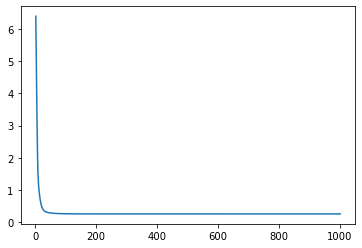

In [8]:
# Plot the loss against the number of epochs
plt.plot(np.arange(1, len(loss)+1, 1), loss)
plt.show()

In [9]:
predictions = []
for elem in predict(X, optimal_wts):
    predictions.append(decision_boundary(elem))

In [10]:
x_train

,3.6216,8.6661
1053,-0.30432,2.65280
874,-1.86290,-0.84841
1086,0.51800,0.25865
435,0.37980,0.70980
55,2.56350,6.77690
...,...,...
364,3.89990,1.73400
519,3.18960,5.75260
1078,0.12126,0.22347
284,1.77470,-6.43340


In [11]:
optim = [optimal_wts[0], optimal_wts[1]]

<ipython-input-12-080dc0fdb7fe>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


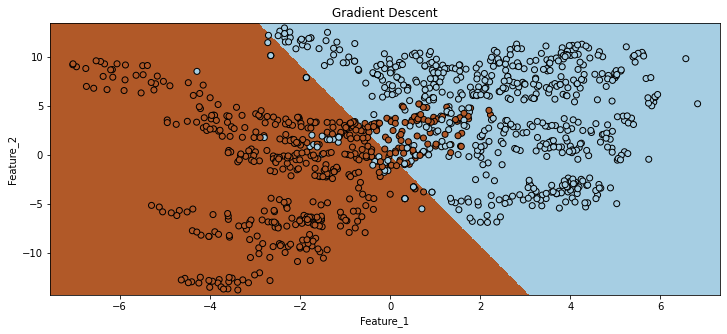

In [12]:
# Plot the decision boundary for two features. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_train.iloc[:,0].min() - 0.5, x_train.iloc[:,0].max() + 0.5
y_min, y_max = x_train.iloc[:, 1].min() - 0.5, x_train.iloc[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
probs = predict(np.c_[xx.ravel(), yy.ravel()], optim)
mesh_preds = []
for elem in probs:
    mesh_preds.append(decision_boundary(elem))
Z = np.array(mesh_preds)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title('Gradient Descent')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

In [13]:
# Accuracy
print(f"Accuracy using gradient descent: {accuracy(predictions, y)}")

Accuracy using gradient descent: 0.8745441283734501


## Scikit-Learn module

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver="lbfgs").fit(x_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver="newton-cg").fit(x_train, y_train)

<ipython-input-16-60a9fed093ec>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(xx, yy, Z_lbfgs, cmap=plt.cm.Paired)
<ipython-input-16-60a9fed093ec>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(xx, yy, Z_newt, cmap=plt.cm.Paired)


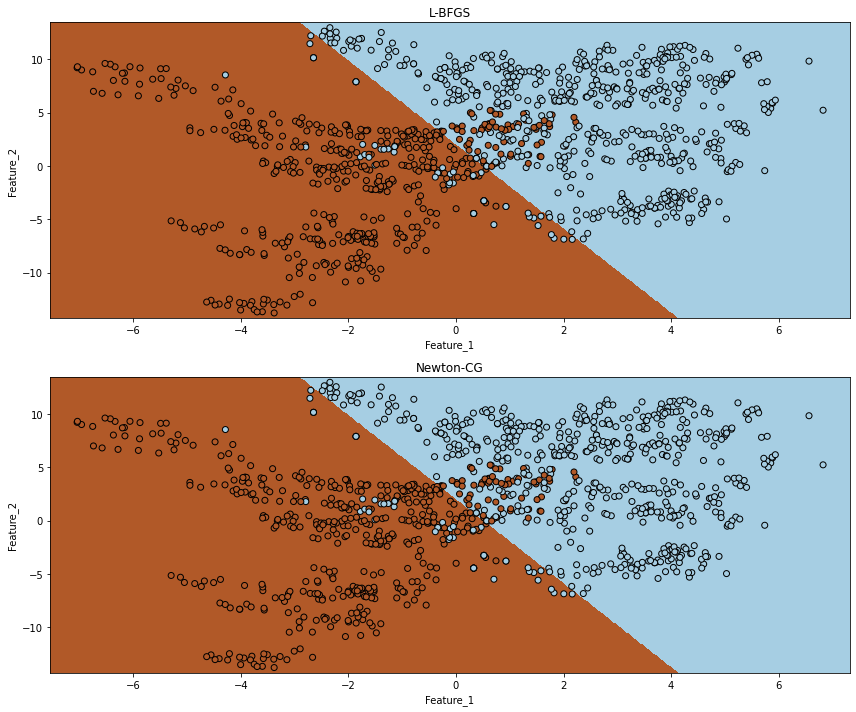

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_train.iloc[:, 0].min() - 0.5, x_train.iloc[:, 0].max() + 0.5
y_min, y_max = x_train.iloc[:, 1].min() - 0.5, x_train.iloc[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_lbfgs = clf_lbfgs.predict(np.c_[xx.ravel(), yy.ravel()])
Z_newt = clf_newt.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z_lbfgs = Z_lbfgs.reshape(xx.shape)
Z_newt = Z_newt.reshape(xx.shape)

fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.pcolormesh(xx, yy, Z_lbfgs, cmap=plt.cm.Paired)

# Plot also the training points
ax1.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, edgecolors="k", cmap=plt.cm.Paired)
ax1.set_xlabel("Feature_1")
ax1.set_ylabel("Feature_2")

ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_title('L-BFGS')
#ax1.set_xticks(())
#ax1.set_yticks(())

ax2 = plt.subplot(2, 1, 2)
ax2.pcolormesh(xx, yy, Z_newt, cmap=plt.cm.Paired)

# Plot also the training points
ax2.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, edgecolors="k", cmap=plt.cm.Paired)
ax2.set_xlabel("Feature_1")
ax2.set_ylabel("Feature_2")

ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_title('Newton-CG')
#ax1.set_xticks(())
#ax1.set_yticks(())
plt.tight_layout()
plt.show()

In [17]:
# Accuracy
print(f"Accuracy using L-BFGS: {accuracy(clf_lbfgs.predict(x_test), y_test)}")
print('\n')
print(f"Accuracy using Newton-CG: {accuracy(clf_newt.predict(x_test), y_test)}")

Accuracy using L-BFGS: 0.8690909090909091


Accuracy using Newton-CG: 0.8690909090909091


In [ ]:
# Fin